In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
# соединим таблицу с рейтингами и названиями фильмов
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

In [8]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


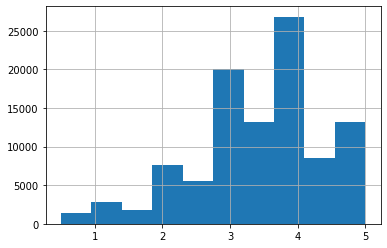

In [9]:
# посмотрим на гистограмму распределения оценок
joined_ratings.rating.hist()

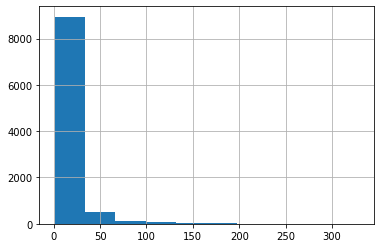

In [10]:
# гистограмма по количеству оценок на фильм
joined_ratings.groupby('title').rating.count().hist()

In [11]:
# достанем топ фильмов по оценкам
top_films = joined_ratings.groupby('title')[['rating']].mean().sort_values('rating', ascending=False)
top_films.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [12]:
joined_ratings[joined_ratings['title']=='Who Killed Chea Vichea? (2010)']

,userId,movieId,rating,timestamp,title,genres
71980,462,152711,5.0,1455645862,Who Killed Chea Vichea? (2010),Documentary


In [13]:
# возьмем только фильмы с наивысшей средней оценкой в 5.0
films_with_highest_marks = top_films.iloc[np.where(top_films.rating == 5.0)].index

In [14]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

In [15]:
# выведем топ фильмов со средней оценкой в 5.0 по количеству отзывов и увидим, что рейтинг получается не самый удачный
sorted([(title_num_ratings[f], f) for f in films_with_highest_marks], key=lambda x: x[0], reverse=True)[:10]

[(2, 'Lesson Faust (1994)'),
 (2, 'Heidi Fleiss: Hollywood Madam (1995)'),
 (2, 'Enter the Void (2009)'),
 (2, 'Lamerica (1994)'),
 (2,
  "Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976)"),
 (2, 'Come and See (Idi i smotri) (1985)'),
 (2, 'Belle époque (1992)'),
 (1, 'Gena the Crocodile (1969)'),
 (1, 'True Stories (1986)'),
 (1, 'Cosmic Scrat-tastrophe (2015)')]

### Приняли решение сортировать фильмы по следующей метрике: средняя оценка фильма, умноженная на нормированное количество рейтингов

In [16]:
# достанем простые статистики по количеству рейтингов
min_num_ratings = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [17]:
print(min_num_ratings)
print(max_num_ratings)
print(mean_num_ratings)
print(median_num_ratings)

1
329
10.374729910484618
3.0


In [18]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

In [19]:
film = "Gena the Crocodile (1969)"

In [20]:
title_mean_rating[film]

5.0

In [21]:
title_num_ratings[film]

1

In [22]:
title_mean_rating[film] * (title_num_ratings[film] - min_num_ratings) / (max_num_ratings - min_num_ratings)

0.0

In [23]:
film_with_our_mark = {}

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark[f] = title_mean_rating[f] * (title_num_ratings[f] - min_num_ratings) / (max_num_ratings - min_num_ratings)

In [24]:
film_with_our_mark_list = [(k,film_with_our_mark[k]) for k in film_with_our_mark.keys()]

In [25]:
title_mean_rating['Forrest Gump (1994)']

4.164133738601824

In [26]:
title_num_ratings['Forrest Gump (1994)']

329

In [27]:
# выводим топ 20 и получилось уже очень неплохо
list(sorted(film_with_our_mark_list, key=lambda x: x[1], reverse=True))[:20]

[('Shawshank Redemption, The (1994)', 4.266984688774333),
 ('Forrest Gump (1994)', 4.164133738601824),
 ('Pulp Fiction (1994)', 3.9155577182807666),
 ('Matrix, The (1999)', 3.5405718108440083),
 ('Silence of the Lambs, The (1991)', 3.526947285601888),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.2249052570206973),
 ('Braveheart (1995)', 2.900818153751158),
 ('Fight Club (1999)', 2.826911781159096),
 ("Schindler's List (1993)", 2.8209603658536584),
 ('Jurassic Park (1993)', 2.7096036585365852),
 ('Terminator 2: Judgment Day (1991)', 2.6997835910278747),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.6990376835047973),
 ('Usual Suspects, The (1995)', 2.622750777140124),
 ('Toy Story (1995)', 2.5581678956324447),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.5527210365853654),
 ('American Beauty (1999)', 2.5104988641798185),
 ('Godfather, The (1972)', 2.4975943216463414),
 ('Lord of the Rings: The Fellowship of the Ring, The (200

### Появилась гипотеза использовать теги в ранжировании фильмов, решили считать не только количество отзывов, а ещё и количество проставленных тегов на фильм

In [28]:
# соединим уже созданную таблицу с таблицей с проставленными тегами по фильмам
joined_with_tags = joined_ratings.join(tags.set_index('movieId'), on='movieId', lsuffix='_left', rsuffix='_right')

In [29]:
joined_with_tags.head()

,userId_left,movieId,rating,timestamp_left,title,genres,userId_right,tag,timestamp_right
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,289.0,moldy,1.143425e+09
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,289.0,old,1.143425e+09


In [30]:
# достанем по каждому фильму количество рейтингов
title_num_tags = {}

for title, group in tqdm_notebook(joined_with_tags.groupby('title')):
    title_num_tags[title] = group.userId_right.unique().shape[0]

In [32]:
#title_num_tags

In [33]:
min_num_tags = np.min([title_num_tags[f] for f in title_num_tags.keys()])
max_num_tags = np.max([title_num_tags[f] for f in title_num_tags.keys()])
mean_num_tags = np.mean([title_num_tags[f] for f in title_num_tags.keys()])
median_num_tags = np.median([title_num_tags[f] for f in title_num_tags.keys()])

In [34]:
print(min_num_tags)
print(max_num_tags)
print(mean_num_tags)
print(median_num_tags)

1
10
1.0210927050108036
1.0


In [35]:
film_with_new_mark = []

for f in title_num_actions.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_new_mark.append(
        (f, title_mean_rating[f] * (title_num_tags[f] - min_num_tags) / (max_num_tags - min_num_tags))
    )

NameError: name 'title_num_actions' is not defined

In [36]:
joined_with_tags[joined_with_tags['title'] == 'Pulp Fiction (1994)'].groupby('userId_right').count()

,userId_left,movieId,rating,timestamp_left,title,genres,tag,timestamp_right
userId_right,,,,,,,,
103.0,921,921,921,921,921,921,921,921
424.0,1228,1228,1228,1228,1228,1228,1228,1228
474.0,307,307,307,307,307,307,307,307
599.0,53111,53111,53111,53111,53111,53111,53111,53111


In [37]:
pf = joined_with_tags[joined_with_tags['title'] == 'Pulp Fiction (1994)']

In [38]:
pf[pf['userId_right'] == 599.0]

,userId_left,movieId,rating,timestamp_left,title,genres,userId_right,tag,timestamp_right
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,1990s,1.498457e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,achronological,1.498456e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,action,1.498456e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,action packed,1.498457e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,aggressive,1.498457e+09
...,...,...,...,...,...,...,...,...,...
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,unusual,1.498457e+09
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,very funny,1.498456e+09
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,violence,1.498456e+09
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,violent,1.498456e+09


In [ ]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))[:20]

## ДЗ

Постройте топ фильмов в категориях Action и Comedy

In [47]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [48]:
joined_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [62]:
act_com_df = joined_ratings[joined_ratings.genres.str.contains('Action', case=False) | joined_ratings.genres.str.contains('Comedy', case=False)]

# я решил построить топ по медианной оценке и количеству просмотров. 
# Возьмем медиану у фильма и посчитаем количество общих просмотров и выберу фильмы с большим количеством просмотров и рейтингом не меньше 4.5

act_com_df['stat'] = 1
act_com_df.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,userId,movieId,rating,timestamp,title,genres,stat
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,1


In [74]:
res_df = pd.pivot_table(act_com_df, values=['stat','rating'],index='title', aggfunc={'rating':'median','stat':'sum'}).reset_index().query('rating >= 4.5')
res_df.sort_values(['stat'], ascending=False).head(20)

,title,rating,stat
3672,Pulp Fiction (1994),4.5,307
2944,"Matrix, The (1999)",4.5,278
4272,Star Wars: Episode IV - A New Hope (1977),4.5,251
1561,Fight Club (1999),4.5,218
4273,Star Wars: Episode V - The Empire Strikes Back...,4.5,211
1111,"Dark Knight, The (2008)",4.5,149
3641,"Princess Bride, The (1987)",4.5,142
281,Apocalypse Now (1979),4.5,107
1301,Dr. Strangelove or: How I Learned to Stop Worr...,4.5,97
4160,Snatch (2000),4.5,93
